# GRIP : The Sparks Foundation


# Data Science and Business Analytics Intern 


# Author : Komal Jain


# Task 2 : Prediction Using Unsupervised ML


# Problem Statement : From the given ‘Iris’ dataset, predict the optimum number of clustersand represent it visually.



# K-means Clustering (Unsupervised Learning)
A cluster refers to a collection of data points aggregated together because of certain similarities
The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


# Importing the required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

# Load the iris dataset


In [2]:
cd C:\Users\KHUSHAL\Downloads

C:\Users\KHUSHAL\Downloads


In [3]:
df = pd.read_csv('Iris.csv')
df.drop(['Id'],axis=1,inplace=True)


# Reading the dataset

In [4]:
df.head(10) #diplay the fisrt 10 dataset.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df['Species'].value_counts()


2    50
1    50
0    50
Name: Species, dtype: int64

# Using Pairplots for better understanding of the data points distribution

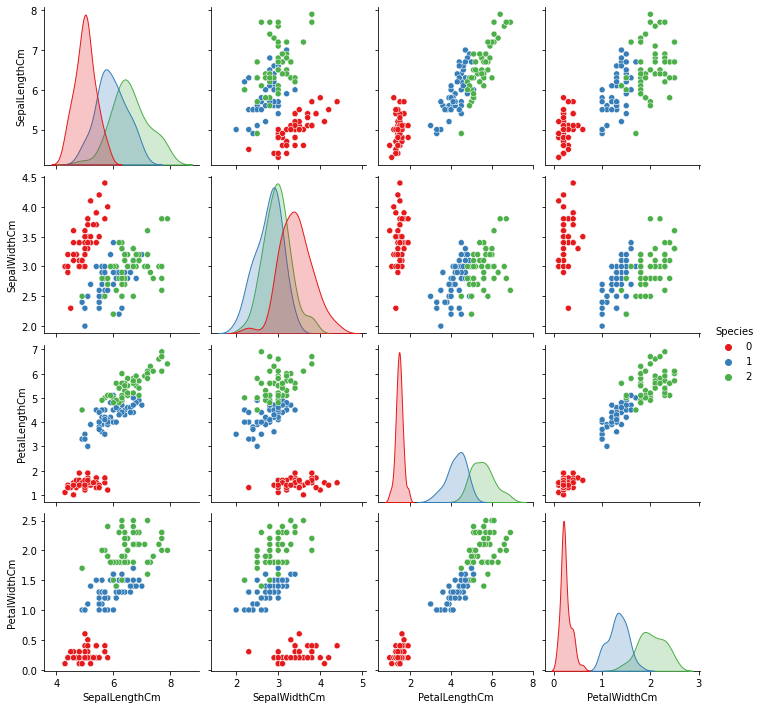

In [12]:
sns.pairplot(data=df,hue="Species",palette="Set1")
plt.show()


# Checking the correlation

<AxesSubplot:>

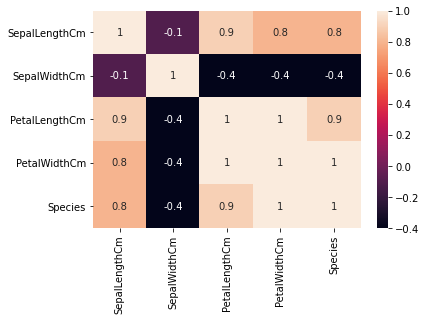

In [13]:
import seaborn as sns
correlation_matrix = df.corr().round(1)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
#the correlation co-efficient ranges from -1 to 1


# Elbow Method using within-cluster-sum-of-squares(wcss)

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss


[780.8243999999995,
 179.1222103386809,
 87.31002785114046,
 66.97905140650855,
 50.41949126984125,
 42.76576857602942,
 35.37683172302739,
 31.263211936614116,
 29.322562200800057,
 27.38062885154062]

# Using Elbow graph to find optimum no. of Clusters

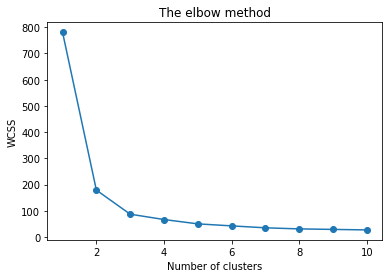

In [15]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Initialization using K-means++

In [16]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

# Visualizing the Clusters

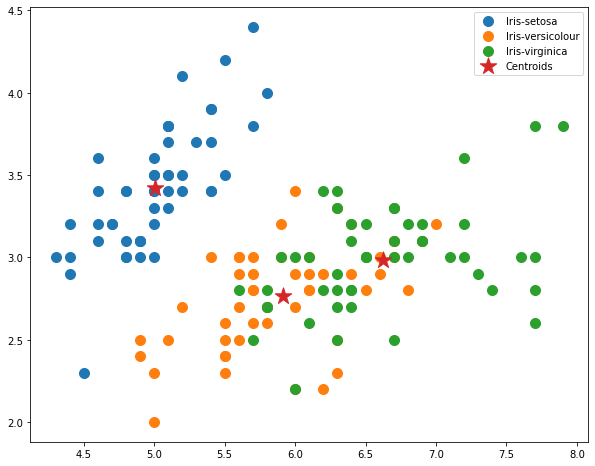

In [18]:
fig = plt.figure(figsize=(10, 8))

k_means=KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(df)
kmeans.cluster_centers_

df['Cluster']=y_kmeans

df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]

plt.scatter(df1.SepalLengthCm,df1.SepalWidthCm,label = 'Iris-setosa',s=100)
plt.scatter(df2.SepalLengthCm,df2.SepalWidthCm,label = 'Iris-versicolour',s=100)
plt.scatter(df3.SepalLengthCm,df3.SepalWidthCm,label = 'Iris-virginica',s=100)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",label="Centroids",s=300,)


plt.legend()


# Thank you...